In [3]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sea 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [5]:
# import dataset 
data= pd.read_csv('social_network.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


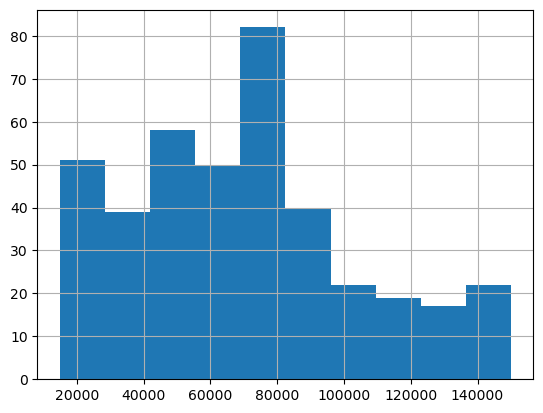

In [9]:
#distribution 
# histogram
data['EstimatedSalary'].hist()
plt.show()

In [34]:
# extract dependent and independent variables 
np.array(data)
x=data.iloc[:,:3]
y=data.iloc[:,3]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x[:,1] = encoder.fit_transform()

InvalidIndexError: (slice(None, None, None), 1)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train['Gender'] = encoder.fit_transform(x_train['Gender'])
x_test['Gender']=encoder.fit_transform(x_test['Gender'])
x_train
x_test

,User ID,Gender,Age
132,15725660,1,30
309,15652400,0,38
341,15776844,1,35
196,15738448,0,30
246,15638003,0,35
...,...,...,...
146,15750839,0,27
135,15578006,1,23
390,15807837,1,48
264,15600379,1,48


In [61]:
# standard scaling z=x-xmean/std
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train
x_test

array([[ 4.78960539e-01,  1.02020406e+00, -8.04802115e-01],
       [-5.54771608e-01, -9.80196059e-01, -1.25440855e-02],
       [ 1.20119022e+00,  1.02020406e+00, -3.09640847e-01],
       [ 6.59405075e-01, -9.80196059e-01, -8.04802115e-01],
       [-7.57919871e-01, -9.80196059e-01, -3.09640847e-01],
       [ 1.72553483e+00,  1.02020406e+00, -1.10189888e+00],
       [-1.15107956e+00, -9.80196059e-01, -7.05769861e-01],
       [-1.57040131e-01,  1.02020406e+00, -2.10608593e-01],
       [-3.60879806e-01, -9.80196059e-01, -1.99318916e+00],
       [-9.76984730e-01,  1.02020406e+00,  8.78746198e-01],
       [-3.23319037e-02,  1.02020406e+00, -8.04802115e-01],
       [ 1.52879272e+00, -9.80196059e-01, -1.00286662e+00],
       [ 1.15325699e+00,  1.02020406e+00, -1.11576339e-01],
       [-1.58748780e+00,  1.02020406e+00,  8.64881682e-02],
       [ 7.67928607e-01,  1.02020406e+00, -1.79512465e+00],
       [ 1.37425498e+00, -9.80196059e-01, -6.06737608e-01],
       [ 9.71556625e-01,  1.02020406e+00

In [57]:
cls=KNeighborsClassifier()
cls.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
y_pred=cls.predict(x_test)

In [59]:
y_pred

array([ 17000,  71000,  33000,  17000,  71000,  79000,  51000,  50000,
        82000,  20000,  18000,  31000,  33000,  61000,  25000,  62000,
        33000,  15000,  21000,  18000,  33000,  45000,  72000,  23000,
        23000,  36000,  15000,  18000,  50000,  41000,  19000,  39000,
        59000,  59000,  32000,  25000,  16000,  41000,  28000,  30000,
        32000,  57000,  47000,  31000,  22000,  15000,  55000,  36000,
        80000,  20000, 108000,  50000,  33000,  74000,  26000,  25000,
        17000,  16000,  54000,  18000,  43000,  60000,  15000,  27000,
        82000,  60000,  17000,  32000,  65000,  63000,  28000,  55000,
        16000,  79000,  79000,  18000,  30000,  72000,  88000,  30000,
        34000,  26000,  17000,  27000,  23000,  30000,  50000,  23000,
        22000,  61000,  57000,  33000,  27000,  22000,  80000,  17000,
        22000,  54000,  20000,  57000], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.0

# with new dataset iris

In [31]:
from sklearn.datasets import load_iris
irisdata=load_iris()
irisdata

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [32]:
a=irisdata.data
b=irisdata.target

In [35]:
b

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=.20,random_state=42)

In [50]:
# enumerate fumc fetch the value and its index 
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [46]:
train_accuracy

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# loop over k values 
list(enumerate(neighbors))  #=[(1,0),(2,1)]
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(a_train,b_train)
    #compute accuracy
    train_accuracy[i]=knn.score(a_train,b_train)
    test_accuracy[i]=knn.score(a_test,b_test)

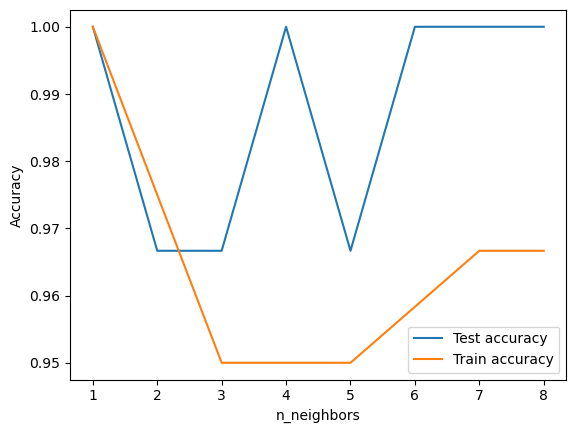

In [48]:
# Generate plot
plt.plot(neighbors,test_accuracy,label='Test accuracy')
plt.plot(neighbors,train_accuracy,label='Train accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()